# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [5]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [10]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

In [14]:
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print(f'The silhouette score for the model is = {score}', score)

The silhouette score for the model is = 0.5486213604076143 0.5486213604076143


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [21]:
kmeans_1 = KMeans(n_clusters=5, random_state=0).fit(X)

In [22]:
score_1 = silhouette_score(X, kmeans_1.labels_, metric='euclidean')
print(f'The silhouette score for the model is = {score_1}')

The silhouette score for the model is = 0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [23]:
kmeans_2 = KMeans(n_clusters=3, random_state=0).fit(X)

In [24]:
score_2 = silhouette_score(X, kmeans_2.labels_, metric='euclidean')
print(f'The silhouette score for the model is = {score_2}')

The silhouette score for the model is = 0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

[-17592296.383508474, -4543749.614531862, -2370689.6867829696, -1331903.0622637174, -916379.1871539166, -647326.0020260852, -412303.8282508012, -323211.55263465445, -270954.9292415374, -225537.08924740576]


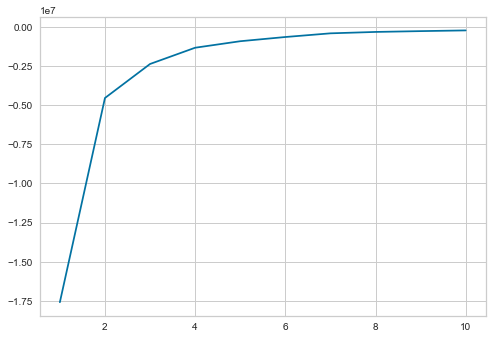

In [29]:
models = [KMeans(i) for i in range(1,11)]
scores = [m.fit(X).score(X) for m in models]
print(scores)
plt.plot(range(1,11),scores);

In [31]:
from yellowbrick.cluster import KElbowVisualizer

#### Distortion

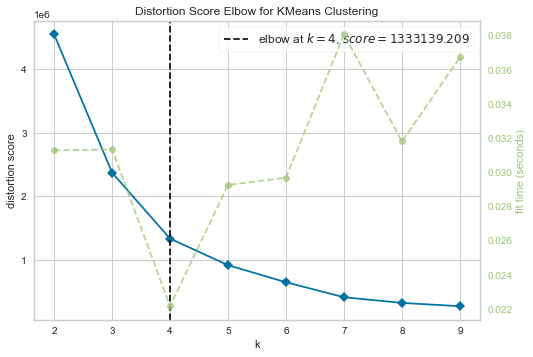

In [32]:
#Instantiate the clustering model and visualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

- As we can see from the figure, 4 is the best number of clusters

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [33]:
from sklearn.cluster import AgglomerativeClustering

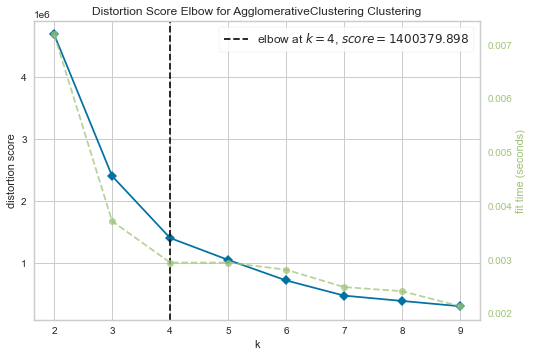

In [35]:
# Instantiate the clustering model and visualizer
aglo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglo, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

- Again, as we can see from the figure, 4 is the best number of clusters

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [37]:
sns.set_theme(style="ticks")

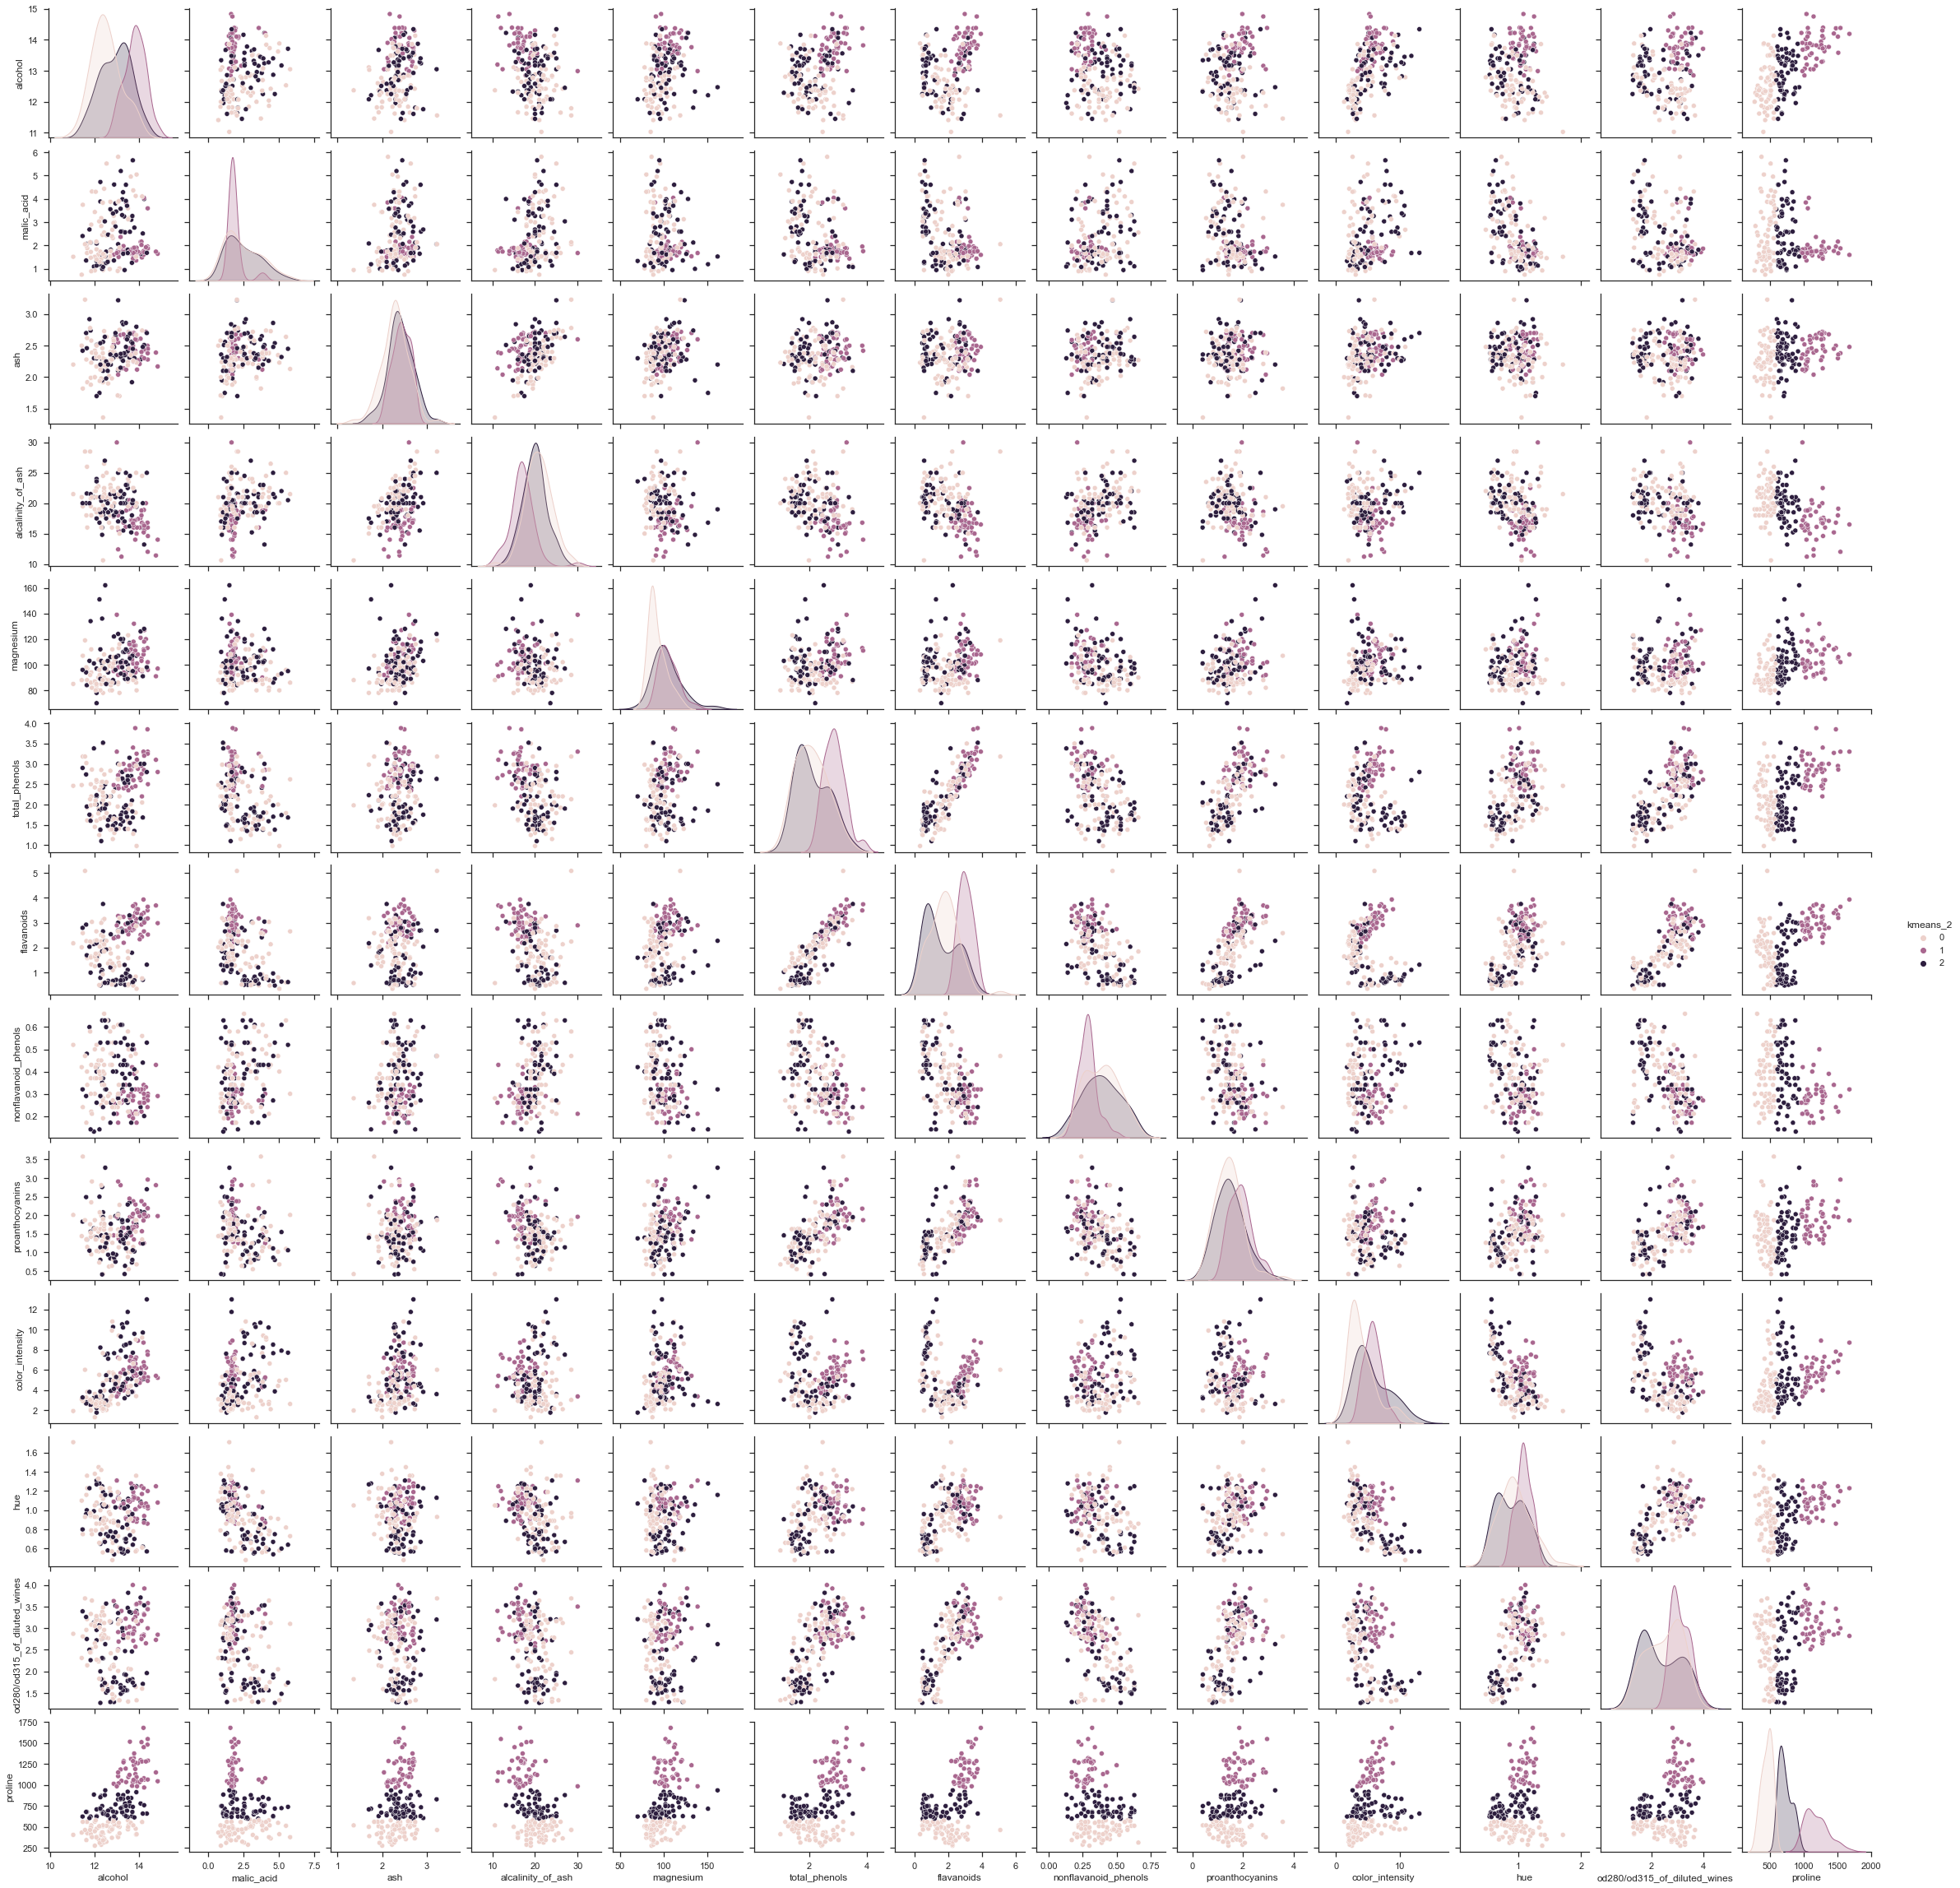

In [39]:
#Ive used one of the models created above kmeans2
df = pd.DataFrame(X, columns=data['feature_names'])
kmeans_2.fit(df)
df["kmeans_2"] = kmeans_2.labels_
sns.pairplot(df, hue="kmeans_2");

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


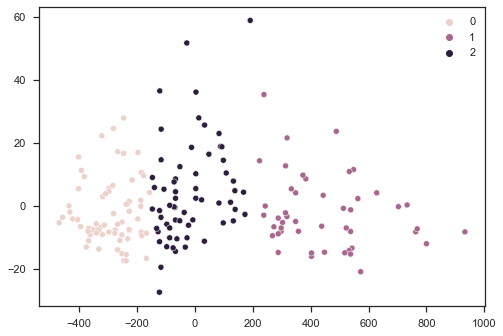

In [43]:
Y = pca.transform(X)

sns.scatterplot(Y[:,0],Y[:,1], hue=kmeans_2.labels_);

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.